In [ ]:
import sys
!{sys.executable} -m pip install pandas tqdm matplotlib numpy

# https://awstip.com/how-to-use-a-newer-python-version-in-aws-sagemaker-notebook-1682a89625ef
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

In [7]:
import pandas as pd
from tqdm import tqdm # handy for timing interations
from matplotlib import pyplot as plt
import numpy as np

In [33]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 8

#### Setup for the data

In [3]:
loc_df = pd.read_csv('~/instagram_locations.zip', delimiter='\t')

In [25]:
profiles_df = pd.read_csv('~/SageMaker/data/instagram_profiles.zip', delimiter='\t')

### Research Question 2


#### Plot the number of posts for each profile in descending order.

Text(0, 0.5, 'log(# Profiles)')

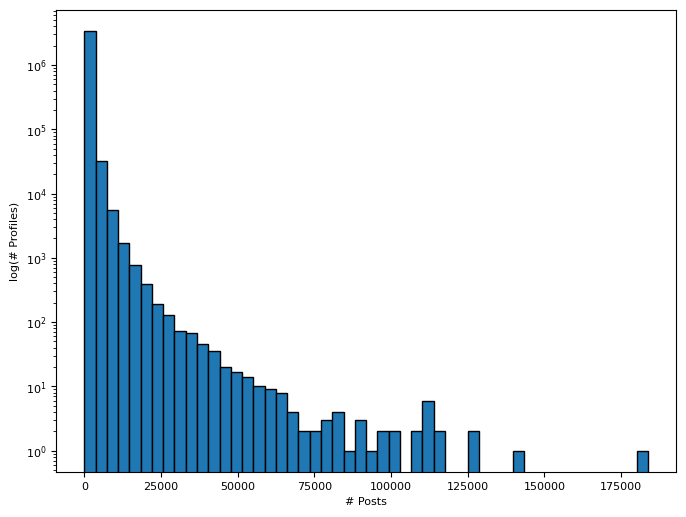

In [34]:
sorted_profiles = profiles_df.sort_values(by='n_posts', ascending=False)
sorted_profiles.dropna(subset=['n_posts'], inplace=True)
sorted_profiles['n_posts'].plot(kind='hist', logy=True, bins=50, edgecolor='black')
plt.xlabel('# Posts')
plt.ylabel('log(# Profiles)')

#### What posts have the highest number of "likes"?

#### What posts have the most and the least number of comments?

#### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

#### How many posts include only photos? How many also have videos?

In [ ]:
# Requires sorting, maybe use cut? 

#### What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?


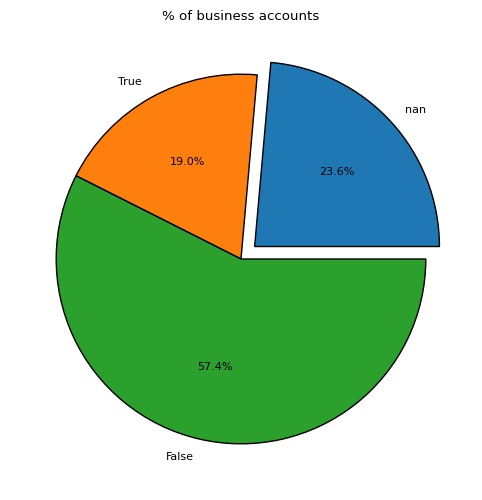

In [35]:
N = len(profiles_df)
n_business_na = profiles_df['is_business_account'].isna().sum()
n_business_false = profiles_df['is_business_account'].value_counts()[False]
n_business_true = profiles_df['is_business_account'].value_counts()[True]

labels = ['nan', 'True', 'False']

plt.pie([n_business_na, n_business_true, n_business_false], labels=labels, explode=[.1, 0, 0], autopct='%1.1f%%', 
        wedgeprops={"edgecolor": "black"})
plt.title('% of business accounts')

plt.show()

### Research Question 3

In [8]:
columns = ['cts']
path = '~/SageMaker/data/instagram_posts.zip'
posts_df = pd.to_datetime(pd.read_csv(path, delimiter='\t', usecols=columns).dropna().stack()).unstack()

# pd.to_datetime(posts_df.dropna().stack()).unstack()

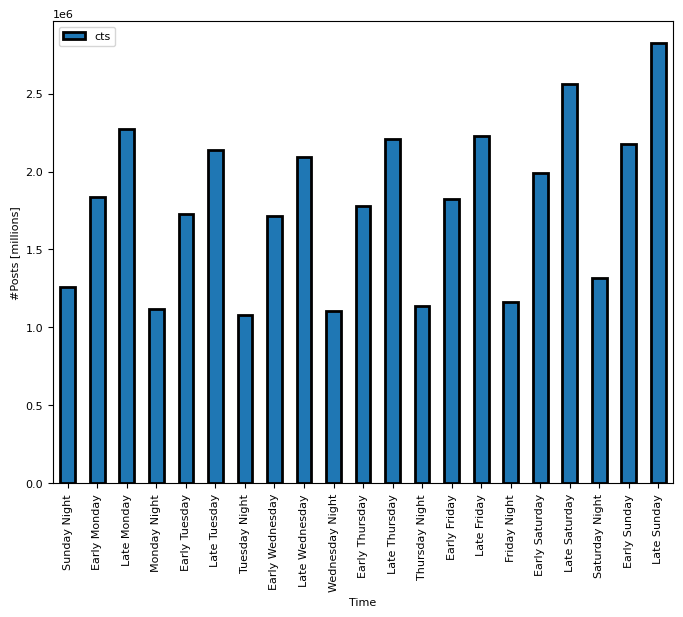

In [36]:
bins = pd.IntervalIndex.from_tuples([(0, 7), (8, 15), (16, 23)])

# posts_df["cts"].dt.hour
labels = ["Sunday Night", "Early Monday", "Late Monday", 
          "Monday Night", "Early Tuesday", "Late Tuesday", 
          "Tuesday Night", "Early Wednesday", "Late Wednesday", 
          "Wednesday Night", "Early Thursday", "Late Thursday", 
          "Thursday Night", "Early Friday", "Late Friday", 
          "Friday Night", "Early Saturday", "Late Saturday", 
          "Saturday Night", "Early Sunday", "Late Sunday"]
loc = range(len(labels))

posts_df.groupby([posts_df["cts"].dt.weekday, 
                  pd.cut(posts_df["cts"].dt.hour, bins=bins)]).count().plot(kind="bar",
                                                                            edgecolor="black",
                                                                            linewidth=1)
plt.xlabel("Time")
plt.ylabel("#Posts [millions]")
plt.xticks(loc, labels, rotation="vertical")
plt.show()


### Research Question 4

### Research Question 5

 ##### Plot the top 10 most popular users in terms of followers and their number of posts.

In [38]:
top_10_profiles = profiles_df.sort_values(by=['followers'], ascending=False).head(10)

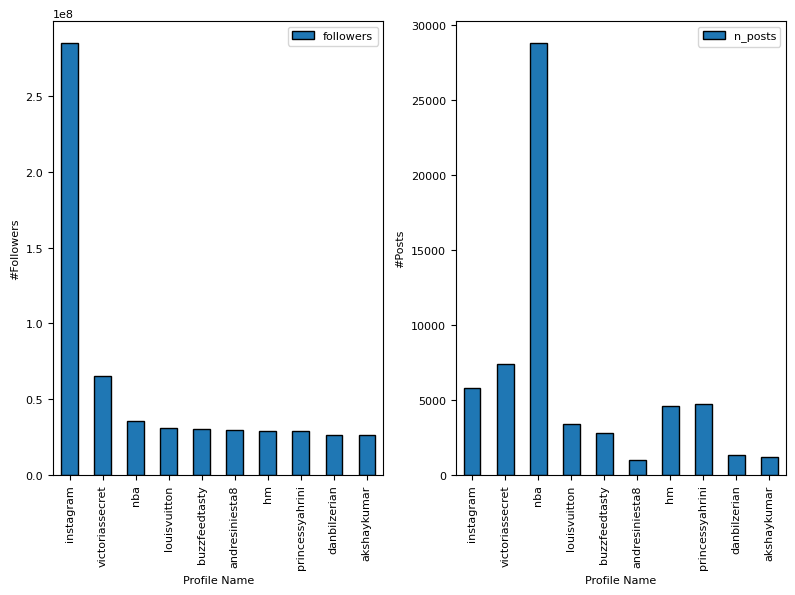

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)

top_10_profiles.plot.bar(x='profile_name', y='followers', ax=ax1, edgecolor='black')
ax1.set_xlabel('Profile Name')
ax1.set_ylabel('#Followers')

top_10_profiles.plot.bar(x='profile_name', y='n_posts', ax=ax2, edgecolor='black')
ax2.set_xlabel('Profile Name')
ax2.set_ylabel('#Posts')

fig.tight_layout()
plt.show()

##### Who is the most influential user?

In [40]:
top_10_profiles.iloc[:2]

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
2880218,336492,25025320.0,instagram,Instagram,Bringing you closer to the people and things y...,226.0,285457645.0,5760.0,help.instagram.com,NaN,False
2582507,371414,3416684.0,victoriassecret,Victoria's Secret,Confidence is sexy. #wearitdaily,549.0,65269440.0,7355.0,like2b.uy/victoriassecret,NaN,True


Not taking Instagrams own account into account, it is [Victoria's Secrtet](https://www.victoriassecret.com/us/).

##### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [42]:
name = 'victoriassecret'
# Need posts df here


How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

### Research Question 6

### Research Question 7

### Research Question 8